# AIF  WEEK2  授業課題

## 主成分分析とは？

データを人に説明するときを考えてみましょう。

たとえばn次元のデータがあったとき、「特徴１のデータは〜、特徴２のデータは〜、...」のようにそれぞれ説明することはできます。
しかし各特徴の傾向を説召したところで全体の特徴を言い表せたことにはなりませし、何より時間がかかります。
このとき全体の特徴を言い表す尺度があれば「このデータ群は〇〇の尺度で表すとこんな傾向にあります。」と簡潔に説明することができます。

このうまい尺度を見つける手法の一つが**主成分分析**と呼ばれる手法になります。

主成分分析とはn次元データを少ない次元に縮め、データ全体を要約する手法です。
注意すべきなのは次元縮めることは「それぞれの特徴を少しずつ集めて妥当な値を決めること」であり、いくつかの特徴を無視するわけではありません。

主成分分析の具体的な方法を簡単に説明すると、

1. もっともばらつき（分散）が大きい軸がそのデータの特徴を説明するのにふさわしい値とみなし、第一主成分とする。
1. 第一主成分に直交する軸の中でもっとも分散が大きい軸を見つけ、それを第二主成分とする。
1. 同様の手順で必要な第n-1主成分まで求める。

となります。

一般的には視覚的に見やすいため2,3次元に圧縮し、グラフ化することが多い。

## 主成分分析の数式を用いた説明


第一主成分を決める際、第一主成分の評価値を$Z$としたとき
それぞれの特徴を加味した値にしたいため、
それぞれの特徴にある重みをかけた和として表し、

$$Z = a_1 x_1 + a_2 x_2 + \cdots + a_n x_n$$

とし、**「Zのばらつきが最も大きくなるような重み$\vec{a} = (a_1, a_2, \cdots, a_n)$が最も全体の特徴を捉えている」**と考え、
この重み$\vec{a} = (a_1, a_2, \cdots, a_n)$を求める。ただし重みを自由に設定できると比較にならないため$\|\vec{a}\|=1$という制約をつける。

つまり主成分分析は「Zの分散が最大となる新しい評価軸の単位ベクトル（$\vec{a}$）を見つけること」です。

話を簡単にするために２次元ベクトルデータを１変数で説明する場合を数式を用いて説明します。

ここで新しい座標軸の単位ベクトルを  $\vec{a}=(a,ab)=(cosθ,sinθ)$ とする。
まず、元の座標でデータの中心化を行い分散を求める。中心化とは、其々の軸の平均値に原点を移動する。分散とは、各データの値$(x_{1},x_{2},・・・ )$から全データの平均値$\overline{x}$ を引いた値（偏）差の2乗の総和をデータの個数で割ったもの。従って、中心化させる事で各データの値がそのまま偏差となって計算が簡単になる。偏差の2乗を取るのは、原点を挟んでプラスとマイナスがあるので、相殺されるのを防ぐためである。
そこで、ある点$k$(中心化後の座標を$x_{k}、y_{k}$とする）と新しい座標軸の単位ベクトルと内積を$D_{k}$とすると、$D_{k}＝ax_{k}＋by_{k} (a=cosθ、b=sinθ)$となる。その2乗は以下のようになる。
$$
(D_{k})^2＝(ax_{k}＋by_{k})^2 = a^2x_{k}^2+b^2y_{k}^2+2abx_{k}y_{k}
$$
分散（var）を求めるには、全てのデータの２乗の和を求めてデータの個数$（n）$で割ればいい。以下のように式が展開されるが、$a^2,b^2$は$(a,b)=(cosθ,sinθ)$ で定数であるため括り出せる。

$$
var=\frac{1}{n}\sum_{k=1}^{n}D_{k}^2 =\frac{1}{n}\sum_{k=1}^{n}(ax_{k}+by_{k})^2=\frac{1}{n}\sum_{k=1}^{n}(a^2x_{k}^2+b^2y_{k}+2abx_{k}y_{k})
\\=a^2\frac{1}{n}\sum_{k=1}^{n}x_{k}^2+b^2\frac{1}{n}\sum_{k=1}^{n}y_{k}^2+2ab\frac{1}{n}\sum_{k=1}^{n}x_{k}y_{k} ・・・(A)
$$
(A)式のa、b以外のところはそれぞれ、回転前の座標軸のx座標の分散（中心化後なので平均0の分散）、y座標の分散、x座標y座標の共分散となっている。これを以下のように定める。
$$
\frac{1}{n}\sum_{k=1}^{n}x_{k}^2 => S_{x} : x座標の分散 \\
\frac{1}{n}\sum_{k=1}^{n}y_{k}^2=> S_{y} : y座標の分散  \\
\frac{1}{n}\sum_{k=1}^{n}x_{k}y_{k} => S_{xy} : x,y座標共分散\\
$$
また、$a＝cosθ、b＝sinθ$から、$a^2＋b^2＝1$の制約もある。
この制約の中で、分散varの最大値を求めるために、ラグランジュの未定係数法を用いる。
この方法によれば、以下のように関数を作り、Gの最大値を与える$a、b、\lambda $を求めれば、Fの最大値を与える$a、b$も求まることが分かっている。

$$
F(a,b)=S_{x}a^2+S_{y}b^2+S_{xy}2ab\\
C(a,b)=a^2+b^2-1=0\\
G(a,b,\lambda ) = F(a,b)-\lambda C(a,b)\\
$$
これを解くには、$G$を$a、b、\lambda $で其々偏微分して、＝0と置いた連立方程式を作る。

$$
G(a,b,\lambda ) = F(a,b)-\lambda C(a,b)=S_{x}a^2+S_{y}b^2+S_{xy}2ab-\lambda (a^2+b^2-1)\\
\frac{∂G}{∂a}=2S_{x}a+2S_{xy}b-2\lambda a=0\\
\frac{∂G}{∂b}=2S_{y}b+2S_{xy}a-2\lambda b=0\\
\frac{∂G}{∂\lambda }=-a^2-b^2+1=0
$$

上記の偏微分した式をまとめると
$$
S_{x}a+S_{xy}b=\lambda a　・・・(1)  \\ 
S_{y}b+S_{xy}a=\lambda b ・・・(2) \\
a^2+b^2=1\\
$$
$$
{\begin{pmatrix}
S_{x} &S_{xy} \\
S_{xy} & S_{y} 
\end{pmatrix}
\begin{pmatrix}
a \\
b \\
\end{pmatrix}=
}
\lambda 
\begin{pmatrix}
a \\
b \\
\end{pmatrix}
$$
この式は共分散行列
\begin{pmatrix}
S_{x} &S_{xy} \\
S_{xy} & S_{y} 
\end{pmatrix}
の固有方程式を求めることで解くことができる。

以上から、$\lambda$は共分散行列の固有値、(a、b)はその固有ベクトルになっているのでそれを求めればよい。
固有ベクトルは通常、a、bの比しか求められないが、ここでは$a^2＋b^2＝1$の制約があるので、各固有値に対する$a、b$は一意に決まる。
   
分散varを最大化する$a、b、\lambda$はラグランジュの未定係数法により、以下の(1)(2)のように求められた。(1)×a＋(2)×bと置くと、これも＝0となる。
これを整理して、$a^2＋b^2＝1$の条件を使うと
$$
S_{x}a+S_{xy}b-\lambda a=0　・・・(1)\\
S_{y}b+S_{xy}a-\lambda b=0　 ・・・(2)\\
$$

$(1) \times a+(2) \times b$は
$$
S_{x}a^2+S_{y}b^2+2S_{xy}ab-\lambda (a^2+b^2)=0\\
\Leftrightarrow 
S_{x}a^2+S_{y}b^2+2S_{xy}ab=\lambda \\
$$
となり、左辺は最大化を目指した主成分得点の分散varに他ならない。このvarの値は固有値$\lambda $そのものであることを示してる。このように主成分分析は固有値問題に帰結することがわかる。

各固有値の大きさが、その軸の主成分得点の分散の大きさを表す。それが大きいほど、全体のデータの特徴を、一方向からよく眺められることになり主成分分析の目的に合致する。

固有値が大きい固有ベクトルから第１主成分、第2主成分、...の軸となる。

対称行列の固有ベクトルは互いに直交するし、各ベクトルの長さは１となり、
共分散行列は対称行列なので、それぞれの主成分軸は直交する。


## Pythonでの実装

ここではpca_scratch（）関数を実装し、
sklearnで用意されているPCAライブラリと同じ値をとるか確認する。

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# 主成分分析をするライブラリ
from sklearn.decomposition import PCA

In [55]:
def pca_scratch(data):
    '''
    自作の主成分分析を行う関数
    n次元から2次元のデータにする。
    引数：元データ　(n次元）行（データ数）列の行列
    返り値：２次元に圧縮されたデータの　2行（データ数）列の行列
    '''
    # データの偏差を求める
    data_deviation = np.array([row - np.mean(row)
                               for row in X.transpose()]).transpose()
    # 分散共分散行列を求める
    cov_array = np.cov(data_deviation.T)
    # cov関数を使わないなら下記のようになる
    # X_bar = np.array([row - np.mean(row) for row in X.transpose()]).transpose()
    # cov_array = np.dot(X_bar.T, X_bar) / (X.shape[0]-1)
    print("スクラッチ分散共分散行列")
    print(cov_array)

    # 上の分散共分散行列を用いて固有値、固有ベクトルを求める
    lam, eigen_vecter = np.linalg.eig(cov_array)
    print("スクラッチ固有値")
    print(lam)
    print("スクラッチ固有ベクトル")
    print(eigen_vecter)

    # np.linalg.eig関数では固有値順にソートされていないため
    # 固有ベクトルを固有値の大きい順にならべかえる
    lam_index = [n for n in range(len(lam))]
    for i in range(len(lam)):
        for j in range(i + 1, len(lam)):
            if lam[i] < lam[j]:
                lam[i], lam[j] = lam[j], lam[i]
                lam_index[i], lam_index[j] = lam_index[j], lam_index[i]

    print("スクラッチ第一主成分の寄与率")
    print(lam[0] / sum(lam))

    # 各データの第一主成分の値を計算
    first_axes = np.dot(eigen_vecter[:, lam_index[0]].T, data.T)
    # 各データの第二主成分の値を計算
    second_axes = np.dot(eigen_vecter[:, lam_index[1]].T, data.T)

    return np.array([first_axes, second_axes])


[[420748.          70137.5        199897.5       ]
 [ 70137.5        120686.11111111  92822.22222222]
 [199897.5         92822.22222222 141894.44444444]]
ライブラリ固有値ベクトル
[[ 0.8497074   0.23978088  0.4695769 ]
 [-0.42326275  0.84127071  0.33632161]]
ライブラリ分散共分散行列
[[420748.          70137.5        199897.5       ]
 [ 70137.5        120686.11111111  92822.22222222]
 [199897.5         92822.22222222 141894.44444444]]
ライブラリ累積寄与率
[0.80636224 0.17927921]
############
スクラッチ分散共分散行列
[[420748.          70137.5        199897.5       ]
 [ 70137.5        120686.11111111  92822.22222222]
 [199897.5         92822.22222222 141894.44444444]]
スクラッチ固有値
[551010.34761483 122506.60493504   9811.60300569]
スクラッチ固有ベクトル
[[-0.8497074  -0.42326275 -0.3143978 ]
 [-0.23978088  0.84127071 -0.48452938]
 [-0.4695769   0.33632161  0.81632426]]
スクラッチ第一主成分の寄与率
0.8063622442455204


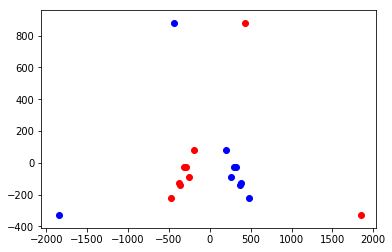

In [56]:
# PCAを使ったお手本コード
# [Pythonのコードのスター総数， Javaのコードのスターの総数, 年収]
X = np.array([[70, 30, 700],[32, 60, 480],[32, 20, 300],[20, 120, 600],[40, 120, 630], [40, 30, 520], [300, 1100, 1200], [2000, 400, 1500],[40, 180, 800]])

pca = PCA(n_components=2)
pca.fit(X)

# データの確認
print("ライブラリ固有値ベクトル")
print(pca.components_)
print("ライブラリ分散共分散行列")
print(pca.get_covariance())
print("ライブラリ累積寄与率")
print(pca.explained_variance_ratio_)

print("############")

# 次元削減をXに適用する．
pca_point = pca.transform(X)

# スクラッチ関数で圧縮したデータも用意する
pca_point2 = pca_scratch(X)

# スクラッチ関数で作った圧縮データは青でライブラリ関数で作った圧縮データは赤でプロットして結果を確認する
plt.scatter(*pca_point.T,  color='red')
plt.scatter(pca_point2[0], pca_point2[1],  color='blue')
plt.show()


## その他授業で学んだこと

- sklearnのPCAがSVDなる類似手法であること
    - 上記のプロット図にあるように左右対称になるケースがある。
- ベイズの定理の応用例（ナイーブベイズフィルタ）
- 形態素解析ライブラリ(MeCab)の使い方